# Introduction to Modern Mathematical Modeling
# Chapter 10; Statistical Models And Hypothesis Tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import kurtosis, skew, norm, t

In [2]:
styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}

plt.rcParams.update(**styledict)

In [3]:
dat1 = pd.read_csv("aravg.ann.land_ocean.90S.90N.v4.0.1.201907.txt",
                   header=None, sep="\s+", index_col=0)
dat1

,1,2,3,4,5
0,,,,,
1880,-0.370221,0.009780,0.001438,0.000850,0.007492
1881,-0.319993,0.009813,0.001438,0.000877,0.007498
1882,-0.320088,0.009803,0.001438,0.000897,0.007468
1883,-0.396044,0.009790,0.001438,0.000910,0.007443
1884,-0.458355,0.009756,0.001438,0.000922,0.007395
...,...,...,...,...,...
2015,0.660687,0.005950,0.000232,0.000002,0.005715
2016,0.701143,0.005950,0.000232,0.000002,0.005715
2017,0.603652,0.005950,0.000232,0.000002,0.005715


In [4]:
tmean15 = np.array(dat1.iloc[:, 0])

print(f"Head of tmean15: {tmean15[:6]}")
print(f"Mean of tmean15: {np.mean(tmean15)}")
print(f"Standard Deviation of tmean15: {np.std(tmean15)}")
print(f"Variance of tmean15: {np.var(tmean15)}")
print(f"Median of tmean15: {np.median(tmean15)}")
print(f"Quantiles of tmean15: {np.quantile(tmean15, [.05, .25, .5, .75, .95])}")

Head of tmean15: [-0.370221 -0.319993 -0.320088 -0.396044 -0.458355 -0.470374]
Mean of tmean15: -0.18017524999999998
Standard Deviation of tmean15: 0.32932871877763115
Variance of tmean15: 0.10845740501171607
Median of tmean15: -0.274373
Quantiles of tmean15: [-0.57622605 -0.4085405  -0.274373    0.023481    0.4237657 ]


In [6]:
print(f"Skewness of tmean15: {skew(tmean15)}")
print(f"Kurtosis of tmean15: {kurtosis(tmean15)}")

Skewness of tmean15: 0.7863260750758031
Kurtosis of tmean15: -0.24126318321808427


### Statistical Indices
We use
$x = \{x_1, x_2,\cdots, x_n\}$ to denote the time series data.
    Symbolically the above statistical indices are defined as:
    \begin{align*}
    \text{Mean: }\mu(x) &= \frac{1}{n}\sum_{k=1}^n x_k\\
    \text{Variance by unbiased estimate: } \sigma^2(x) &= \frac{1}{n-1}\sum_{k=1}^n \left(x_k - \mu(x)\right)^2 \\
    \text{Standard Deviation: } \sigma(x) &= \sqrt{\sigma^2(x)} \\
    \text{Skewness: } \gamma_3(x) &= \frac{1}{n}\sum_{k=1}^n \left(\frac{x_k - \mu(x)}{\sigma(x)}\right)^3\\
    \text{Kurtosis: } \gamma_4(x) &= \frac{1}{n}\sum_{k=1}^n \left(\frac{x_k - \mu(x)}{\sigma(x)}\right)^4 - 3\\
    \end{align*}

In [7]:
yrtime = np.arange(1880, 2016)
regTrend = np.polyfit(yrtime, tmean15[:tmean15.shape[0]-4], 1)
trend = lambda t: regTrend[0]*t + regTrend[1]

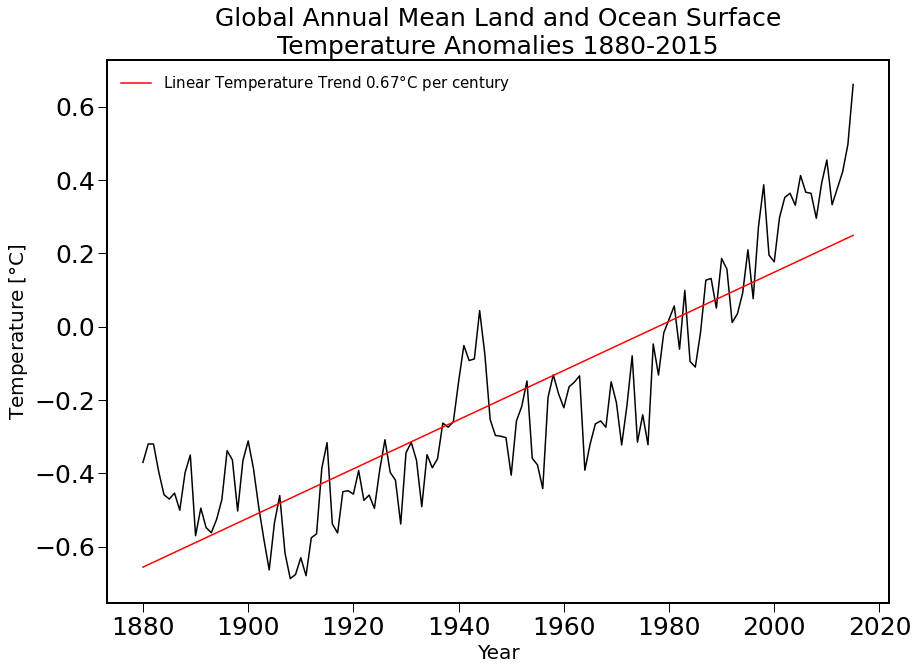

In [8]:
fig, ax = plt.subplots(1, figsize=(14, 10))

ax.plot(yrtime, tmean15[:tmean15.shape[0]-4], '-k')
ax.plot(yrtime, trend(yrtime), '-r', label=f"Linear Temperature Trend "
                                           f"{100*regTrend[0]:3.2f}$\degree$C"
                                           f" per century")
ax.legend(loc='upper left')
ax.set_ylabel("Temperature [$\degree$C]")
ax.set_xlabel("Year")
ax.set_title("Global Annual Mean Land and Ocean Surface\n"
             "Temperature Anomalies 1880-2015")

fig.savefig("CH10;GlobalAnnualMeanLandandOceanSurface.jpg", bbox_inches='tight')

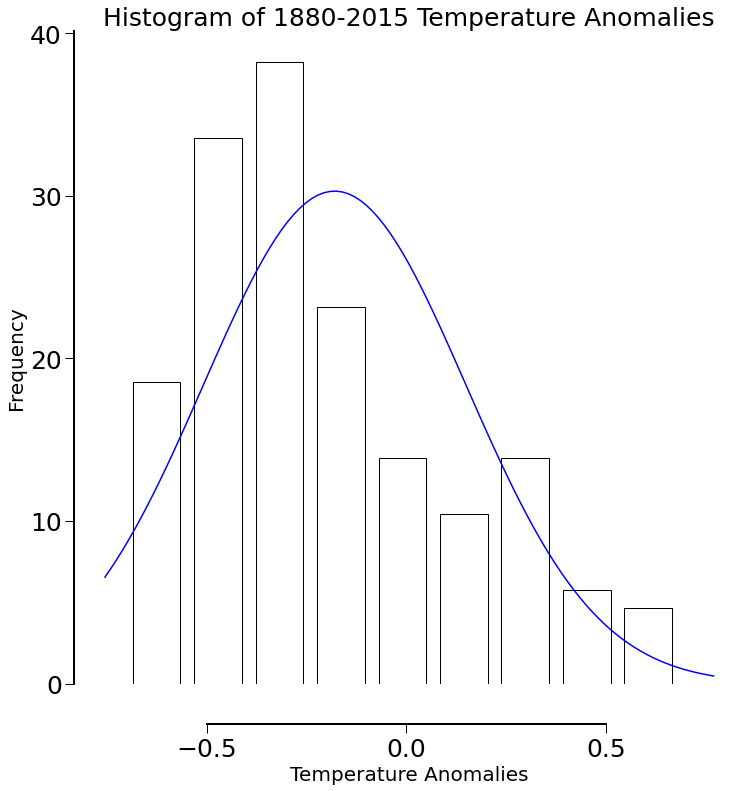

In [9]:
fig, ax = plt.subplots(1, figsize=(12,12))

h = ax.hist(tmean15, bins=9, fc='w', ec='k', width=.12, align='mid', density=True)
mu, std = norm.fit(tmean15)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 101)
ax.plot(x, norm.pdf(x, mu, std), '-b')

ax.set_ylabel("Frequency")
ax.set_yticks([.4*i for i in range(5)])
ax.set_yticklabels([10*i for i in range(5)])

ax.set_xlabel("Temperature Anomalies")
ax.set_xticks([-.5, 0, .5])

ax.spines['bottom'].set_bounds(-.5,.5)
ax.spines['bottom'].set_position(('data',-.1))

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)

ax.set_title("Histogram of 1880-2015 Temperature Anomalies")

fig.savefig("CH10;AnomaliesHistogram.jpg", bbox_inches='tight')

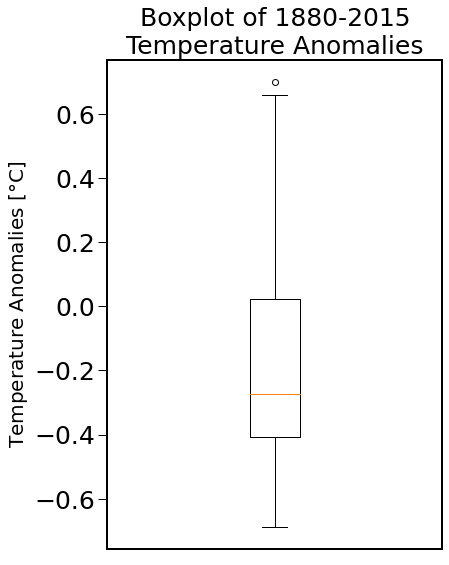

In [10]:
fig, ax = plt.subplots(figsize=(6,9))

ax.boxplot(tmean15)
ax.set_ylabel("Temperature Anomalies [$\degree$C]")
ax.set_xticks([])
ax.set_title("Boxplot of 1880-2015\nTemperature Anomalies")

fig.savefig("CH10;AnomaliesBoxplot.jpg", bbox_inches='tight')

In [11]:
ust = pd.read_csv("USJantemp1951-2016-nohead.csv", header=None)
soi = pd.read_csv("soi-data-nohead.csv", header=None)

In [12]:
soid = np.array(soi.iloc[:,1])
soij = soid[12*np.arange(66)]

ustj = np.array(ust.iloc[:,2])

dataTrend = np.polyfit(soij, ustj, 0)[0]

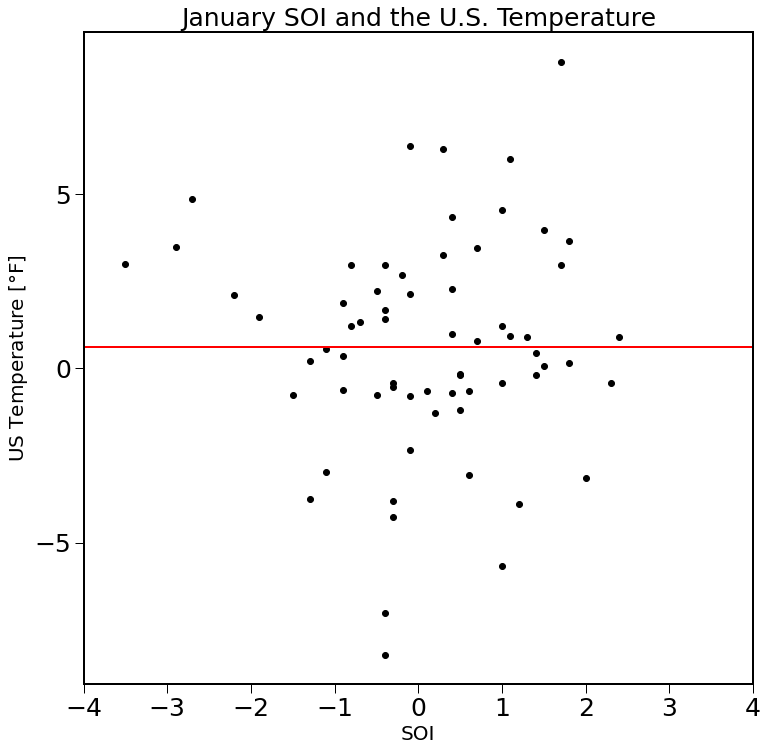

In [13]:
fig, ax = plt.subplots(1,figsize=(12,12))

ax.plot(soij, ustj, 'ok')
ax.axhline(dataTrend, lw=2, color='r')

ax.set_ylabel("US Temperature [$\degree$F]")
ax.set_yticks([-5, 0, 5])

ax.set_xlim(-4, 4)
ax.set_xlabel("SOI")

ax.set_title("January SOI and the U.S. Temperature")

fig.savefig("CH10;JanSOIandTemp.jpg", bbox_inches='tight')

In [15]:
tstand = (tmean15 - np.mean(tmean15))/np.std(tmean15)

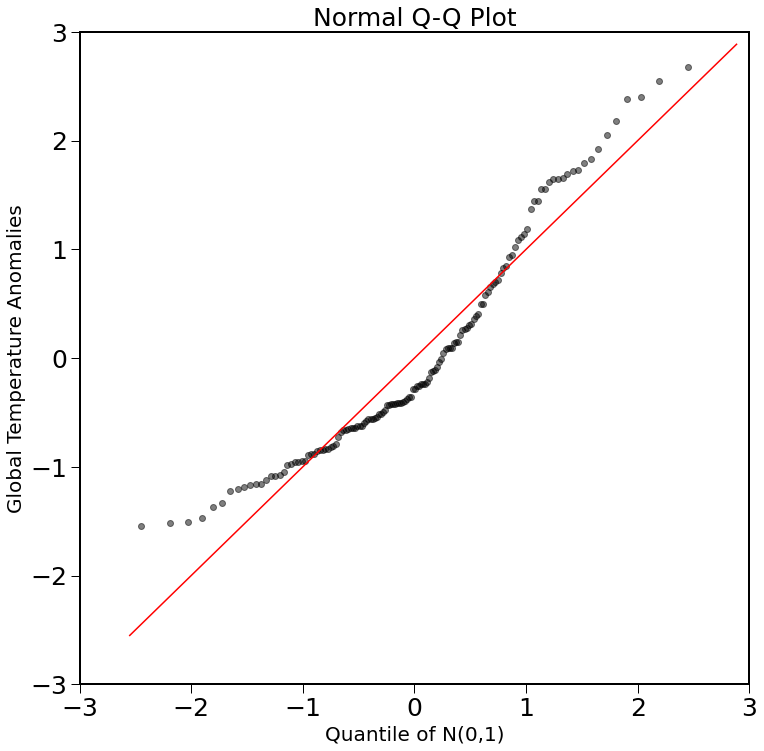

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sm.qqplot(tstand, line='45', ax=ax, marker='o', alpha=.5, color='black')
ax.set_ylabel("Global Temperature Anomalies")
ax.set_xlabel("Quantile of N(0,1)")
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_title("Normal Q-Q Plot")

fig.savefig("CH10;QQPlotofTempAnomalies.jpg", bbox_inches='tight')

In [18]:
labels = ['Las Vegas', 'San Diego', 'Seattle']
clear = [0.58,0.40,0.16]
cloudy = [0.42,0.6,0.84]
width = 1

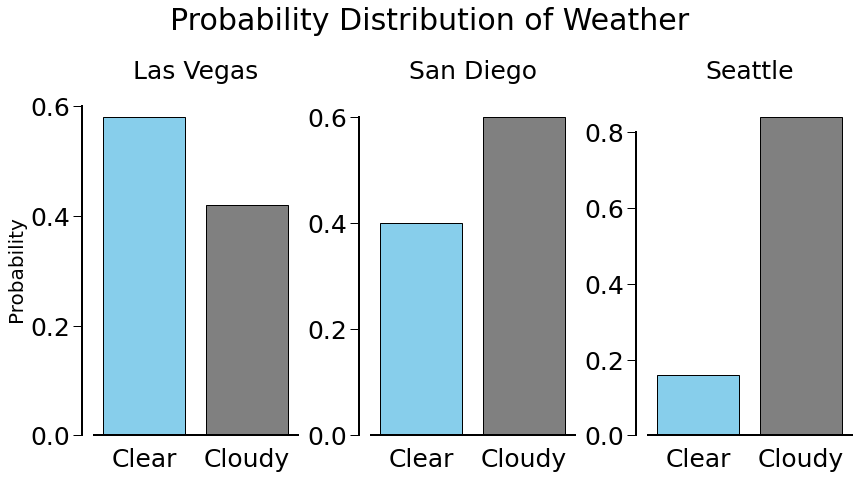

In [19]:
fig, ax = plt.subplots(1,3, figsize=(12, 6))

for (axes, sunny, clouds, place) in zip(ax, clear, cloudy, labels):
    axes.bar(-width/2, sunny, fc='skyblue', ec='k')
    axes.bar(width/2, clouds, fc='gray', ec='k')
    axes.set_xticks([-width/2, width/2])
    axes.set_xticklabels(['Clear', 'Cloudy'])
    axes.set_title(place, y=1.05)
    axes.spines['right'].set_linewidth(0)
    axes.spines['top'].set_linewidth(0)
    axes.spines['left'].set_position(('data',-1.1))
    lims = axes.get_yticks()
    axes.spines['left'].set_bounds(lims[0], lims[-2])
    axes.tick_params(axis='x', width=0)


ax[0].set_ylabel("Probability")

fig.suptitle("Probability Distribution of Weather", size=30, y=1.1)
fig.tight_layout(pad=1)

fig.savefig("CH10;ProbabilityWeatherPlots.jpg", bbox_inches='tight')

In [20]:
x = np.linspace(-3.5, 3.5, 1001)
pdf = norm.pdf(x, 0, 1)
here = [True if (i < -1.5 or i > -1.2) else False for i in x]
l = np.mean([-1.5, -1.2])
mid = np.where(np.abs(x - l) < .001)[0]
point = (x[mid], pdf[mid]/2)

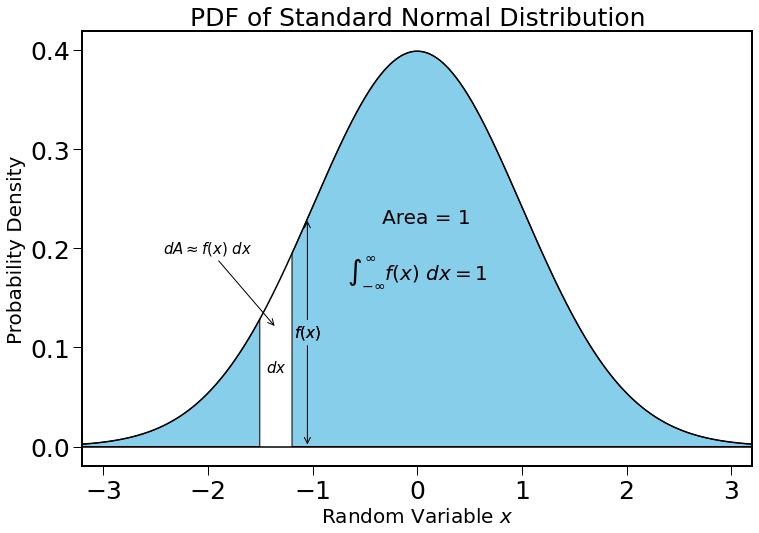

In [21]:
fig, ax = plt.subplots(1, figsize=(12,8))

ax.plot(x, pdf, '-k')
ax.axhline(y=0, color='k')
ax.fill_between(x, pdf, where=here, fc='skyblue', ec='k')
ax.set_xlim(-3.2, 3.2)
ax.set_ylabel("Probability Density")
ax.set_yticks([0.1*i for i in range(5)])
ax.set_xlabel("Random Variable $x$")
ax.set_title("PDF of Standard Normal Distribution")

ax.text(0, pdf.max()/2, "   Area = 1\n\n$\int_{-\infty}^\infty f(x)\ dx = 1$",
        fontsize=20, horizontalalignment="center", verticalalignment="center")
ax.text(*point, "$dx$", fontsize=15,
        horizontalalignment='center', verticalalignment="center")
ax.annotate(r"$dA \approx f(x)\ dx$", xy=(point[0],point[1]*1.5), xytext=(-2,.2), fontsize=15,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})
ax.annotate("$f(x)$", xy=(x[350], 0), fontsize=15, xytext=(x[350], pdf[350]/2),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})
ax.annotate("$f(x)$", xy=(x[350], pdf[350]), fontsize=15, xytext=(x[350], pdf[350]/2),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

fig.savefig("CH10;PDFofSND.jpg", bbox_inches='tight');

In [22]:
fmts = ['-r', '-b', '-k', '-m', '-g']
mus = [0, 0, 0, 3, -4]
stds = [1, 2, .5, 1, 1]
x = np.linspace(-7, 7, 1001)

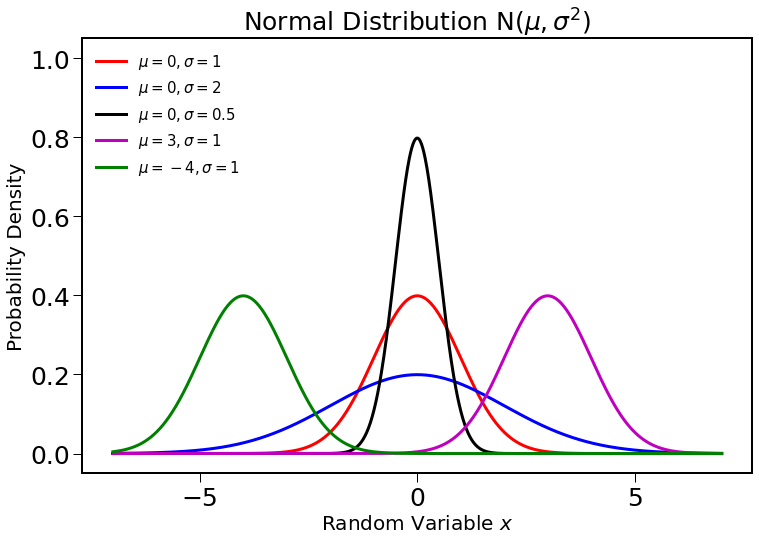

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

for (fmt, mu, std) in zip(fmts, mus, stds):
    ax.plot(x, norm.pdf(x, mu, std), fmt, lw=3, label=f"$\mu = {mu}, \sigma = {std}$")

ax.legend(loc='upper left')
ax.set_ylabel("Probability Density")
ax.set_xlabel("Random Variable $x$")
ax.set_ylim(-.05, 1.05)
ax.set_xticks([-5, 0, 5])
ax.set_title("Normal Distribution N($\mu, \sigma^2$)")

fig.savefig("CH10;NormalDistsPDFs.jpg", bbox_inches='tight');

In [35]:
dfs = [3, 1, 2, 6, 10_000]
x = np.linspace(-4, 4, 101)

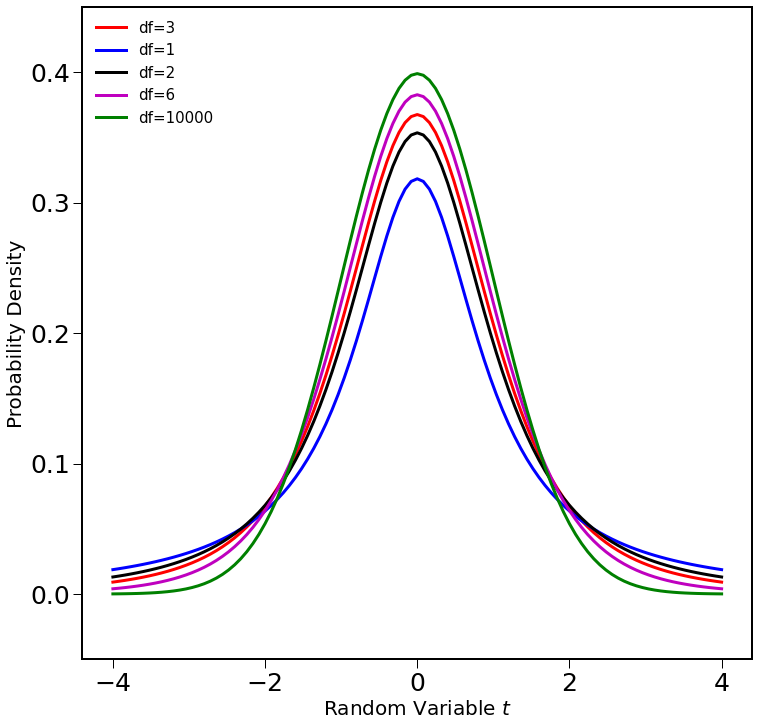

In [43]:
fig, ax = plt.subplots(figsize=(12,12))

for (df, fmt) in zip(dfs, fmts):
    ax.plot(x, t.pdf(x, df), fmt, lw=3, label=f"df={df}")
ax.legend(loc='upper left')
ax.set_ylim(-.05, .45)
ax.set_ylabel("Probability Density")
ax.set_xlabel("Random Variable $t$")

fig.savefig("CH10;StudentTPDFs.jpg", bbox_inches='tight');

In [5]:
mu = 14 # True Mean
sig = 0.3 # True SD
n = 50 # Sample size
d = 1.96*sig/np.sqrt(n)

lowerlim, upperlim = mu-d, mu+d

ksim = 10_000 # Number of simulations

In [6]:
sims = np.random.normal(loc=mu, scale=sig, size=(n, ksim))
xbars = np.mean(sims, axis=0)

k = len(np.where((lowerlim <= xbars) & (xbars <= upperlim))[0])

print(f"{k} out of our {ksim} generated means are within the range "
      f"({lowerlim:4.2f},{upperlim:4.2f}).")

9518 out of our 10000 generated means are within the range (13.92,14.08).


(13.92, 14.08)


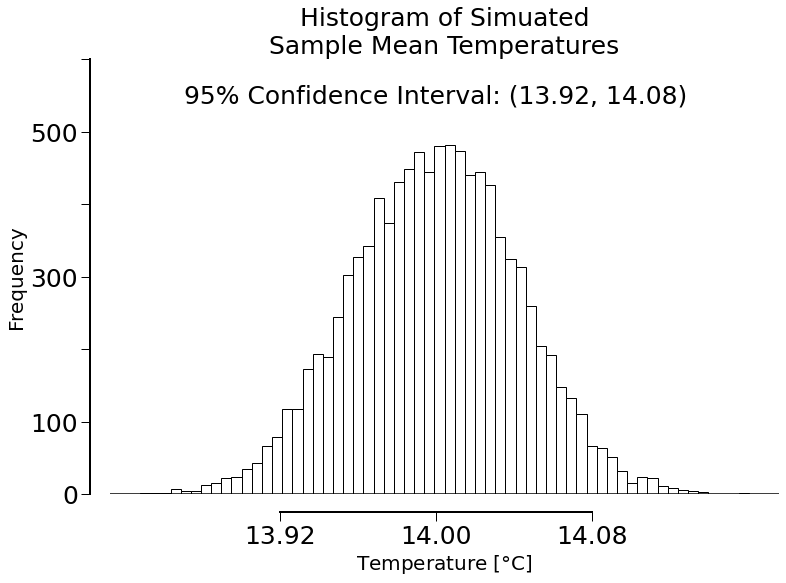

In [51]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

ax.hist(xbars, bins=60, ec='black', fc='white')
ax.axhline(y=0, color='black')

ax.set_ylabel("Frequency")
ax.set_yticks([100*i for i in range(7)])
ax.set_yticklabels([100*i if i % 2 == 1 or i == 0 else None for i in range(7)])
ax.spines['left'].set_position(('data', 13.823))

ax.set_xlabel("Temperature [$\degree$C]")
ax.set_xticks([13.92, 14.00, 14.08])
ax.spines['bottom'].set_position(('data',-25))
ax.spines['bottom'].set_bounds(np.round(lowerlim, 2), np.round(upperlim, 2))
print(ax.spines['bottom'].get_bounds())

ax.set_title("Histogram of Simuated\n"
             "Sample Mean Temperatures")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(mu, 550, f"95% Confidence Interval: (13.92, 14.08)", size=25,
            horizontalalignment="center", verticalalignment="center")

fig.savefig("CH10;HistogramofSimulateSampleMeans.jpg", bbox_inches='tight');

In [85]:
x = np.linspace(-3, 3, 1000)
curve = norm.pdf(x, 0, 1)

blues = [False if -1 < i < 1 else True for i in x]
reds = [False if -2 < i < 2 else True for i in x]

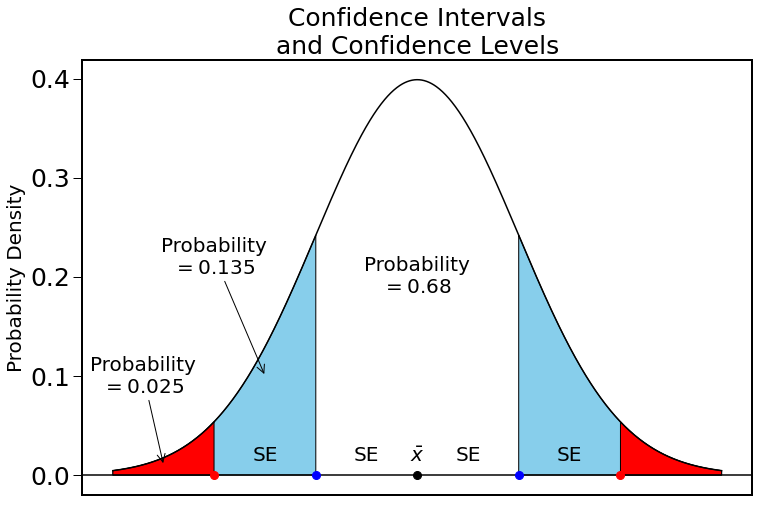

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(x, curve, '-k')
ax.axhline(y=0, xmin=-3, xmax=3, color='black')
for (fmt, sd) in zip(['or', 'ob', 'ok', 'ob', 'or'], [i for i in range(-2, 3)]):
    ax.plot(sd, 0, fmt, ms=8)

for (here, col) in zip([blues, reds], ['skyblue', 'red']):
    ax.fill_between(x, np.zeros(x.size), curve, where=here, fc=col, ec='black')

ax.set_xticks([])

ax.set_title("Confidence Intervals\n"
             "and Confidence Levels")

ax.text(0, .2, "Probability\n$= 0.68$", size=20,
            horizontalalignment="center", verticalalignment="center")
ax.text(0, .02, r"$\bar{x}$",size=20,
            horizontalalignment="center", verticalalignment="center")
for loc in np.linspace(-1.5, 1.5, 4):
    ax.text(loc, .02, "SE", size=20,
                horizontalalignment="center", verticalalignment="center")

ax.annotate("Probability\n$= 0.135$", xy=(-1.5, 0.1), fontsize=20,
            xytext=(-2, .22),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

ax.annotate("Probability\n$= 0.025$", xy=(-2.5,.01), fontsize=20,
            xytext=(-2.7, 0.1),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

ax.set_ylabel("Probability Density")

fig.savefig("CH10;ConfidenceIntervalsandLevels.jpg", bbox_inches='tight');

In [139]:
lime = [True if i >= -1.96 else False for i in x]
skyblue = [True if i < -2.5 else False for i in x]

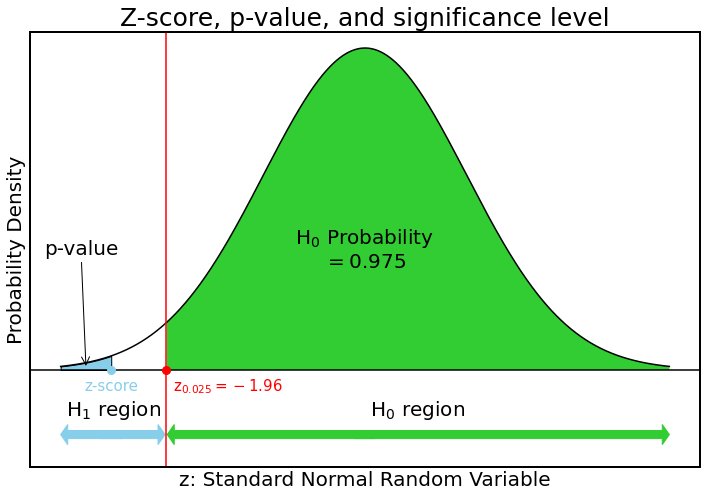

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(x, curve, '-k')
ax.axhline(y=0, color='black')
ax.axvline(x=-1.96, color='red')
ax.fill_between(x, np.zeros(x.size), curve, where=lime, fc='limegreen')
ax.fill_between(x, np.zeros(x.size), curve, where=skyblue,
                fc='skyblue', ec='black')
ax.annotate("p-value", xy=(-2.75, .0025), xytext=(-2.8, .15), size=20,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

ax.plot(-1.96, 0, 'or', ms=8)
ax.text(-1.35, -.02, s="z$_{0.025} = -1.96$", size=15, color='red',
            horizontalalignment="center", verticalalignment="center")

ax.plot(-2.5, 0, marker='o', color='skyblue', ms=8)
ax.text(-2.5, -.02, s="z-score", size=15, color='skyblue',
            horizontalalignment="center", verticalalignment="center")

yl, yg = ax.get_ylim()
ax.set_ylim(yl-.1, yg)

ax.set_yticks([])
ax.set_ylabel("Probability Density")

ax.set_xticks([])
ax.set_xlabel("z: Standard Normal Random Variable")

ax.arrow(-2.6, -.08, -1.97+2.6, 0, color='skyblue', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)
ax.arrow(-2.4, -.08, -3+2.4, 0, color='skyblue', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)

ax.arrow(-.1, -.08, 3+.1, 0, color='limegreen', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)
ax.arrow(.1, -.08, -.1-1.95, 0, color='limegreen', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)

ax.text(np.mean([-1.96, 3]), -.05, s="H$_0$ region", size=20,
            horizontalalignment="center", verticalalignment="center")
ax.text(np.mean([-1.96, -3]), -.05, s="H$_1$ region", size=20,
            horizontalalignment="center", verticalalignment="center")

ax.text(0, 0.15, s="H$_0$ Probability\n$=0.975$", size=20,
            horizontalalignment="center", verticalalignment="center")

ax.set_title("Z-score, p-value, and significance level")

fig.savefig("CH10;SignificancePlot.jpg", bbox_inches='tight');

### Hypothesis Test for NOAA's Global Temps 2006 - 2015

In [208]:
tm0615 = np.array(dat1.loc['2006':'2015', 1])
tm8190 = np.array(dat1.loc['1981':'1990', 1])
tm9100 = np.array(dat1.loc['1991':'2000', 1])

In [207]:
meanEst = np.mean(tm0615)
sdEst = np.std(tm0615)
n = 10

t_score = meanEst/(sdEst/np.sqrt(n))
pVal = t.sf(t_score, df=n-1)
print(f"t_score: {t_score}, p-value: {pVal}")
print(t.ppf(1-.025, df=n-1))

t_score: 13.372992812825727, p-value: 1.5223677385167033e-07
2.2621571627409915


In [211]:
barT1 = np.mean(tm8190)
barT2 = np.mean(tm9100)

S1sd = np.std(tm8190)
S2sd = np.std(tm9100)

Spool = np.sqrt(((n-1)*S1sd**2 + (n-1)*S1sd**2)/(2*(n - 1)))
t_s = (barT2 - barT1)/(Spool*np.sqrt(2/n))

tlow = t.ppf(.025, df=2*(n-1))
tup = t.ppf(.975, df=2*(n-1))

print(f"t-score: {t_s}\n"
      f"tlow: {tlow}\n"
      f"tup: {tup}")

pval = t.sf(t_s, df=2*(n-1))
print(f"p-value: {pval}")

print(f"1981-1990 temp: {barT1}\n"
      f"1991-2000 temp: {barT2}\n"
      f"barT2 - barT1: {barT2 - barT1}")

t-score: 2.853762175463511
tlow: -2.10092204024096
tup: 2.10092204024096
p-value: 0.005273010319796836
1981-1990 temp: 0.0368277
1991-2000 temp: 0.16120410000000002
barT2 - barT1: 0.12437640000000003


In [4]:
tm = np.array(dat1.loc[:'2015', 1])
x = np.arange(1880, 2016)

tTrend = np.polyfit(x, tm, deg=1, full=True)
print(tTrend)

(array([ 6.70281864e-03, -1.32572468e+01]), array([3.16179836]), 2, array([1.41414175, 0.01425207]), 3.019806626980426e-14)


In [ ]:
help(norm)